**LETS GROW MORE**

Data Science Internship(LGM VIP-SEPT 2021)

**TASK 2**:Prediction Using Decision Tree Algorithm (Level - Intermediate)

Problem:Create the Decision Tree classifier and visualize it graphically.The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

By:SOWMYA MOHAN

**IMPORTING THE REQUIRED LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING THE DATASET**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Dimple79/LGMVIP-DataScience/main/Task%201/1.%20Iris%20Flower%20Classification%20ML%20Project/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**DATA EXPLORATION**

TO CHECK FOR NULL VALUES

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values.

In [3]:
df.shape

(150, 6)

The data consist of 150 rows and 6 attributes.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.drop('Id',axis=1, inplace=True)
df.shape

(150, 5)

Id column is removed as it is irrelevant in predicting species of flower.

**EXPLORATORY DATA ANALYSIS**

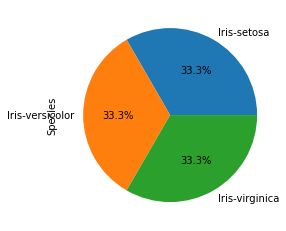

In [9]:
df['Species'].value_counts().plot(kind='pie', autopct="%.1f%%")

In [12]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


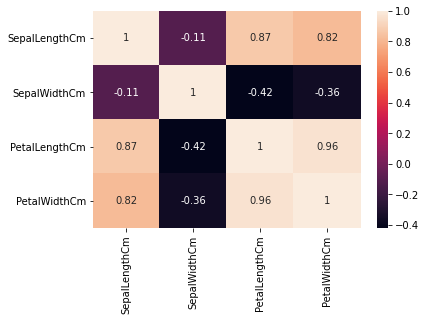

In [13]:
sns.heatmap(df.corr(), annot=True)

**SPLITTING DATA INTO TRAIN AND TEST**

In [15]:
x = df.iloc[:,:4].values
y = df.iloc[:,4:5]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [16]:
print(x_train.shape)

(120, 4)


In [17]:
print(x_test.shape)

(30, 4)


In [18]:
print(y_train.shape)

(120, 1)


In [19]:
print(y_test.shape)

(30, 1)


**BUILDING THE MODEL**

In [20]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [21]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
y_pred = model.predict(x_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


**LET'S CHECK THE ACCURACY OF THE MODEL**

In [23]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  1.0


This shows that our model is 100% accurate.

**Predicting the class for the new data**

In [25]:
new_data = [[3.5, 3.0, 1.2, 1.7]]
y_pred = model.predict(new_data)
print(y_pred)

['Iris-virginica']


**VISUALIZING THE DECISION TREE**

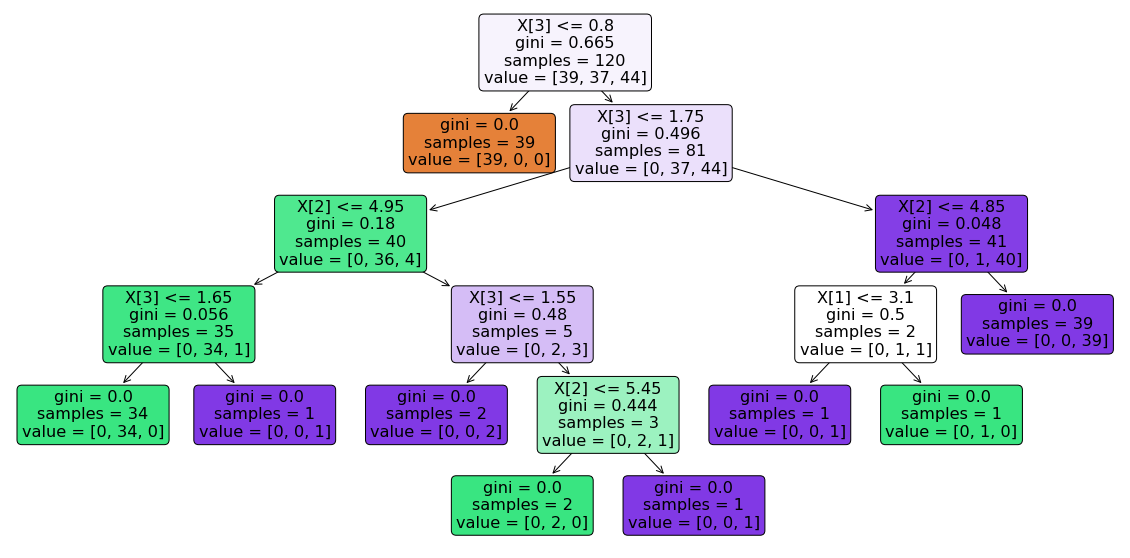

In [26]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
tree.plot_tree(model, filled=True, rounded=True)
plt.show()

**END OF TASK 2**

**THANK YOU!!!** 